## Importing Libraries 

In [2]:
import pandas as pd
import warnings
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

## 2. Reading the data

In [6]:
# Negative = 1 , Positive = 2

data = pd.read_csv("../dataset/reviews.csv", )
data = data.sample(n=6000, random_state=42, ignore_index=True)
data.head()

,class_index,review_text
0,1,I expected the prices of the entrees to be a l...
1,1,Review of Buffet:\n\nUGH! It was very very un...
2,1,"If you value your life, don't go to Banner Bos..."
3,2,"Before getting started, I'd like to point out ..."
4,1,Very disappointed in this salon. Set an appt 4...


## 3.Data Cleaning

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class_index  6000 non-null   int64 
 1   review_text  6000 non-null   object
dtypes: int64(1), object(1)
memory usage: 93.9+ KB


In [40]:
data.shape

(6000, 2)

In [45]:
data.rename(columns = {"class_index" : "sentiment" , "review_text" : "review"}, inplace=True)
data.head()

,sentiment,review
0,1,I expected the prices of the entrees to be a l...
1,1,Review of Buffet:\n\nUGH! It was very very un...
2,1,"If you value your life, don't go to Banner Bos..."
3,2,"Before getting started, I'd like to point out ..."
4,1,Very disappointed in this salon. Set an appt 4...


In [47]:
data.isnull().sum()

sentiment    0
review       0
dtype: int64

In [49]:
data.duplicated().sum()

0

## 4. EDA

In [52]:
data["sentiment"].value_counts()

sentiment
1    3028
2    2972
Name: count, dtype: int64

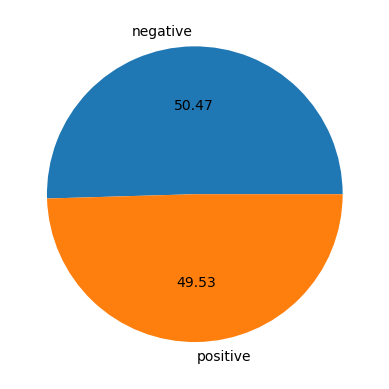

In [54]:
plt.pie(data["sentiment"].value_counts(), labels=["negative", 'positive'], autopct='%0.2f')
plt.show()

In [55]:
data["num_characters"] = data["review"].apply(len)
data

,sentiment,review,num_characters
0,1,I expected the prices of the entrees to be a l...,811
1,1,Review of Buffet:\n\nUGH! It was very very un...,227
2,1,"If you value your life, don't go to Banner Bos...",1446
3,2,"Before getting started, I'd like to point out ...",3266
4,1,Very disappointed in this salon. Set an appt 4...,244
...,...,...,...
5995,2,"So for my cousin's bday, we went to Vegas. An...",558
5996,1,The waiter was great but he just could not do ...,407
5997,1,This is the second time I have dined at Yummy ...,1890
5998,2,I'm a regular. Great espresso and lattes. Grea...,383


In [58]:
data["num_words"] = data["review"].apply(lambda x : len(nltk.word_tokenize(x)))
data.head()

,sentiment,review,num_characters,num_words
0,1,I expected the prices of the entrees to be a l...,811,165
1,1,Review of Buffet:\n\nUGH! It was very very un...,227,46
2,1,"If you value your life, don't go to Banner Bos...",1446,300
3,2,"Before getting started, I'd like to point out ...",3266,685
4,1,Very disappointed in this salon. Set an appt 4...,244,56


In [59]:
data["num_sentences"] = data["review"].apply(lambda x : len(nltk.sent_tokenize(x)))
data.head()

,sentiment,review,num_characters,num_words,num_sentences
0,1,I expected the prices of the entrees to be a l...,811,165,8
1,1,Review of Buffet:\n\nUGH! It was very very un...,227,46,4
2,1,"If you value your life, don't go to Banner Bos...",1446,300,19
3,2,"Before getting started, I'd like to point out ...",3266,685,34
4,1,Very disappointed in this salon. Set an appt 4...,244,56,5


In [62]:
data[["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,6000.000000,6000.000000,6000.000000
mean,726.672333,153.563333,8.508667
std,660.265671,139.526690,6.864069
min,9.000000,1.000000,1.000000
25%,283.000000,60.000000,4.000000
50%,525.000000,112.000000,7.000000
75%,964.250000,203.000000,11.000000
max,5009.000000,1068.000000,73.000000


In [64]:
data[data["sentiment"] == 1][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,3028.000000,3028.000000,3028.000000
mean,824.929987,175.190225,9.452774
std,732.707480,155.410105,7.603753
min,9.000000,3.000000,1.000000
25%,337.000000,71.000000,4.000000
50%,608.000000,130.000000,7.000000
75%,1065.000000,226.000000,12.000000
max,5009.000000,1068.000000,73.000000


In [66]:
data[data["sentiment"] == 2][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,2972.000000,2972.000000,2972.000000
mean,626.563257,131.528937,7.546770
std,559.840130,117.213365,5.864638
min,9.000000,1.000000,1.000000
25%,242.000000,51.000000,4.000000
50%,451.000000,95.000000,6.000000
75%,848.000000,177.000000,10.000000
max,4963.000000,1058.000000,60.000000


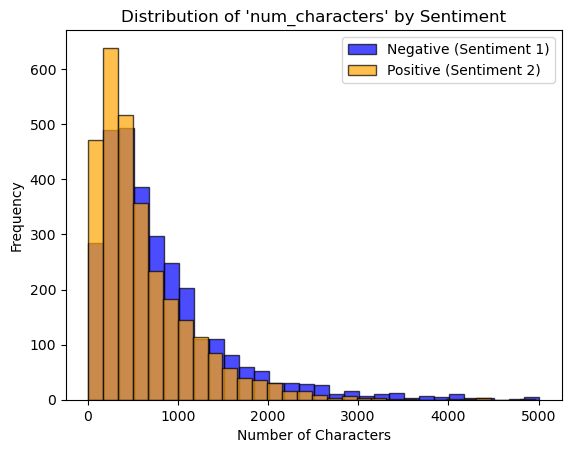

In [68]:
import matplotlib.pyplot as plt

# Simple histogram using matplotlib with improved colors and transparency
plt.hist(
    data[data["sentiment"] == 1]["num_characters"], 
    bins=30, 
    color='blue', 
    alpha=0.7, 
    label='Negative (Sentiment 1)',
    edgecolor='black'
)
plt.hist(
    data[data["sentiment"] == 2]["num_characters"], 
    bins=30, 
    color='orange', 
    alpha=0.7, 
    label='Positive (Sentiment 2)',
    edgecolor='black'
)

# Add title and labels
plt.title("Distribution of 'num_characters' by Sentiment")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")

# Add a legend for clarity
plt.legend()

# Show the plot
plt.show()


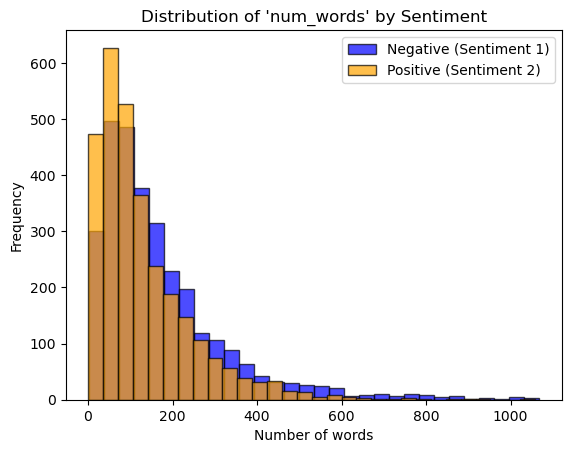

In [70]:
import matplotlib.pyplot as plt

# Simple histogram using matplotlib with improved colors and transparency
plt.hist(
    data[data["sentiment"] == 1]["num_words"], 
    bins=30, 
    color='blue', 
    alpha=0.7, 
    label='Negative (Sentiment 1)',
    edgecolor='black'
)
plt.hist(
    data[data["sentiment"] == 2]["num_words"], 
    bins=30, 
    color='orange', 
    alpha=0.7, 
    label='Positive (Sentiment 2)',
    edgecolor='black'
)

# Add title and labels
plt.title("Distribution of 'num_words' by Sentiment")
plt.xlabel("Number of words")
plt.ylabel("Frequency")

# Add a legend for clarity
plt.legend()

# Show the plot
plt.show()


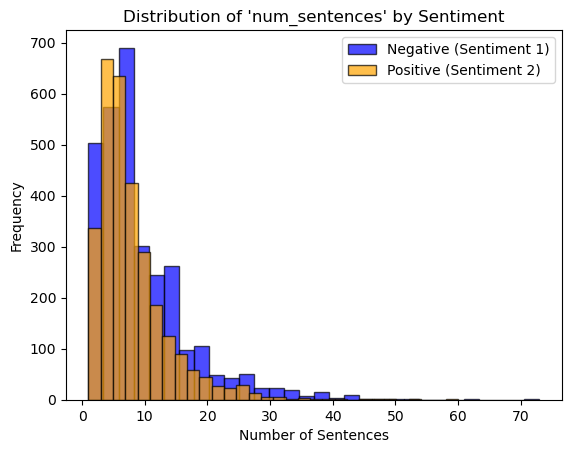

In [71]:
import matplotlib.pyplot as plt

# Simple histogram using matplotlib with improved colors and transparency
plt.hist(
    data[data["sentiment"] == 1]["num_sentences"], 
    bins=30, 
    color='blue', 
    alpha=0.7, 
    label='Negative (Sentiment 1)',
    edgecolor='black'
)
plt.hist(
    data[data["sentiment"] == 2]["num_sentences"], 
    bins=30, 
    color='orange', 
    alpha=0.7, 
    label='Positive (Sentiment 2)',
    edgecolor='black'
)

# Add title and labels
plt.title("Distribution of 'num_sentences' by Sentiment")
plt.xlabel("Number of Sentences")
plt.ylabel("Frequency")

# Add a legend for clarity
plt.legend()

# Show the plot
plt.show()


<Axes: >

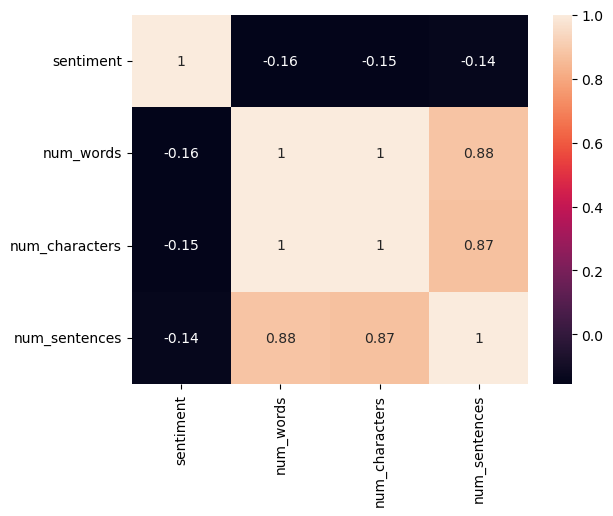

In [73]:
sns.heatmap(data[["sentiment", "num_words", "num_characters", "num_sentences"]].corr(), annot=True)

In [74]:
data[["sentiment", "num_words", "num_characters", "num_sentences"]].corr()

,sentiment,num_words,num_characters,num_sentences
sentiment,1.000000,-0.156468,-0.150223,-0.138845
num_words,-0.156468,1.000000,0.996933,0.882515
num_characters,-0.150223,0.996933,1.000000,0.869813
num_sentences,-0.138845,0.882515,0.869813,1.000000


## 5. Text Preprocessing

* Lower Case
* Tokenization
* Removal of stop words and punctuations
* Removal of special characters
* Stemming

In [79]:
def tranform_text(text):
    
    ## Lower case
    text = text.lower()
    
    ## Tokenization
    text = nltk.word_tokenize(text)
    
    ## Speical characters
    lst = []
    for i in text:
        if i.isalnum():
            lst.append(i)
    
    text = lst[:]
    lst.clear()
    
    ## stop words and punctuations
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            lst.append(i)
            
    text = lst[:]
    lst.clear()
    
    ## Stemming
    ps = PorterStemmer()
    
    for i in text:
        lst.append(ps.stem(i))
    
    
    
    
    return " ".join(lst)

In [81]:
tranform_text("'Review of Buffet:\\n\\nUGH!  It was very very underwhelming. \\n\\nMaybe regular menu is great, but do not get the buffet IMHO.  About half the restaurant was eating the buffet... unfortunately I was in the idiot half of the crowd.'")

'buffet underwhelm regular menu great get buffet imho half restaur eat buffet unfortun idiot half crowd'

In [83]:
data["review"][1]

'Review of Buffet:\\n\\nUGH!  It was very very underwhelming. \\n\\nMaybe regular menu is great, but do not get the buffet IMHO.  About half the restaurant was eating the buffet... unfortunately I was in the idiot half of the crowd.'

In [85]:
data["transformed_text"] = data["review"].apply(tranform_text)
data.head()

,sentiment,review,num_characters,num_words,num_sentences,transformed_text
0,1,I expected the prices of the entrees to be a l...,811,165,8,expect price entre littl bit higher qualiti ch...
1,1,Review of Buffet:\n\nUGH! It was very very un...,227,46,4,review buffet underwhelm regular menu great ge...
2,1,"If you value your life, don't go to Banner Bos...",1446,300,19,valu life go banner boswel husband told go er ...
3,2,"Before getting started, I'd like to point out ...",3266,685,34,get start like point current sit palm casino w...
4,1,Very disappointed in this salon. Set an appt 4...,244,56,5,disappoint salon set appt 4 day ahead time are...


In [86]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="lightgray")

In [87]:
neg_wc = wc.generate(data[data["sentiment"] == 1]["transformed_text"].str.cat(sep=" "))

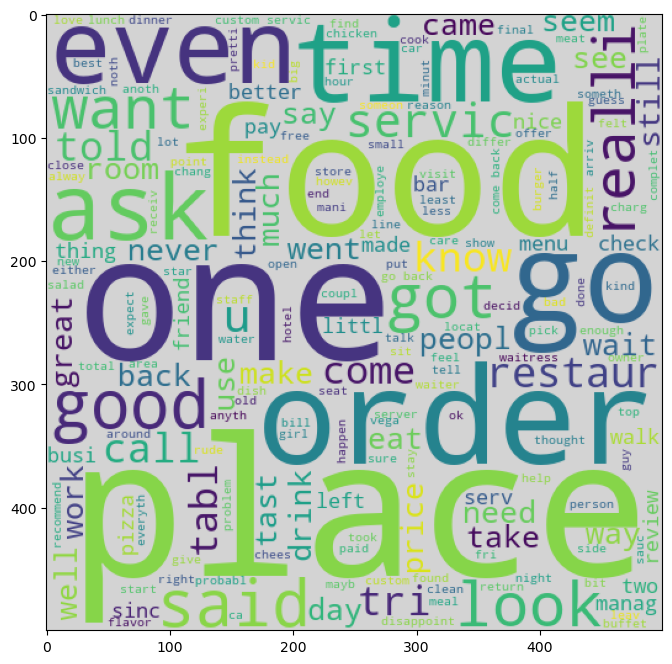

In [88]:
plt.figure(figsize=(10,8))
plt.imshow(neg_wc)

In [89]:
pos_wc = wc.generate(data[data["sentiment"] == 2]["transformed_text"].str.cat(sep=" "))

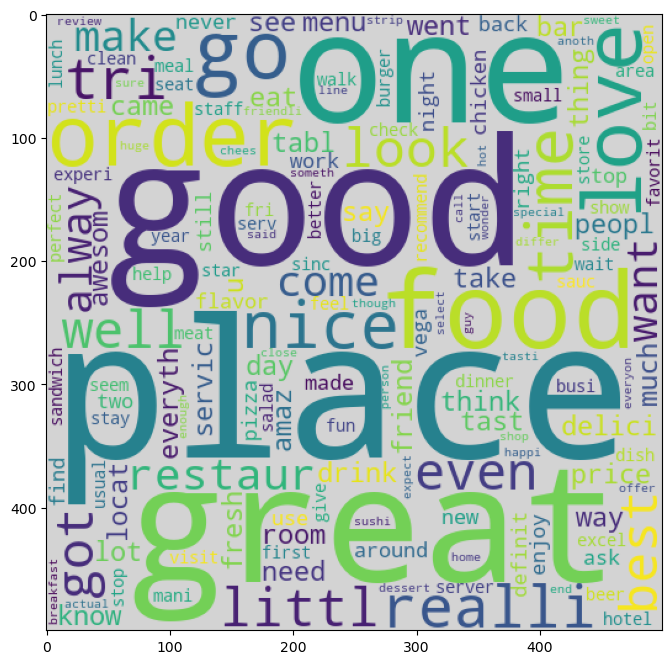

In [90]:
plt.figure(figsize=(10,8))
plt.imshow(neg_wc)

In [91]:
neg_corpus = []
for msg in data[data["sentiment"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        neg_corpus.append(word)
        

In [92]:
len(neg_corpus)

219610

In [93]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(neg_corpus).most_common(30))[0], pd.DataFrame(Counter(neg_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [101]:
pos_corpus = []
for msg in data[data["sentiment"] == 2]["transformed_text"].tolist():
    for word in msg.split():
        pos_corpus.append(word)

In [103]:
len(pos_corpus)

167340

In [105]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(pos_corpus).most_common(30))[0], pd.DataFrame(Counter(pos_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

## 6. Model Building 

In [110]:
cv = CountVectorizer()

In [112]:
X = cv.fit_transform(data["transformed_text"]).toarray()

In [113]:
X.shape

(6000, 16215)

In [114]:
y = data["sentiment"].values

In [116]:
y

array([1, 1, 1, ..., 1, 2, 2], dtype=int64)

In [120]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [122]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "SVM (Linear)": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


results = []
for name, model in models.items():
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)  
    acc = accuracy_score(y_test, y_pred)  
    results.append((name, acc))
    print(f"{name}: Accuracy = {acc:.4f}")



Logistic Regression: Accuracy = 0.8708
Multinomial Naive Bayes: Accuracy = 0.8550
Bernoulli Naive Bayes: Accuracy = 0.7592
SVM (Linear): Accuracy = 0.8408
Decision Tree: Accuracy = 0.7150
KNN: Accuracy = 0.6575
Random Forest: Accuracy = 0.8533
AdaBoost: Accuracy = 0.8367
Bagging: Accuracy = 0.7900
Extra Trees: Accuracy = 0.8592
Gradient Boosting: Accuracy = 0.8267


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [1 2]

In [125]:
# 🔹 6. Find Best Model
best_model = max(results, key=lambda x: x[1])
print(f"\n✅ Best Model: {best_model[0]} with Accuracy: {best_model[1]:.4f}")


✅ Best Model: Logistic Regression with Accuracy: 0.8708


In [128]:
lr = LogisticRegression()
mnb = MultinomialNB()

In [132]:
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,y_pred1))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred1))
print("Precision Score: ", precision_score(y_test,y_pred1))

Accuracy:  0.8708333333333333
Confusion Matrix:  [[529  78]
 [ 77 516]]
Precision Score:  0.8729372937293729


In [133]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,y_pred2))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred2))
print("Precision Score: ", precision_score(y_test,y_pred2))

Accuracy:  0.855
Confusion Matrix:  [[514  93]
 [ 81 512]]
Precision Score:  0.8638655462184874


In [136]:
import pickle

pickle.dump(cv, open("vectorizer.pkl", "wb"))
pickle.dump(lr, open("model.pkl", "wb"))